In [1]:
import numpy as np 
import pandas as pd
import scipy 
from scipy import stats
import seaborn as sns

# End to End EDA:
# MISSING VALUES: 
# Outlier analysis and Removal: boxplot & normal distribution(statistical methods)
#  ** Features Engineering ** (to extract the new feature from the existing one )
# **Statistical Analaysis to verify the relation between Predictor and TGT *** 
# Data Transformation and Scaling & Encoding : Also known as data preprocesing stage
# final step is 
## ** Model Building **

In [2]:
sales=pd.read_csv('https://datahack-prod.s3.amazonaws.com/train_file/train_v9rqX0R.csv')

In [3]:
sales

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
sales.shape

(8523, 12)

In [5]:
sales.shape

(8523, 12)

In [6]:
sales.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
# Check the head of the data /preview the data


In [9]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [10]:
# Target variable is defined as the which we will have to find out or predict for the future/
# in EDA it is called dependent variable 
# in this the Item_outlet sales is a target variable 



In [11]:
# Predicotors vs target variable :: independent varibales vs Dependent variable

In [12]:
# To find the list of numerical and categorical columns

In [13]:
nums=sales.select_dtypes(include=np.number).columns # to find the numerical variables in a dataset
nums

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

# UNIVARIATE Analysis:

In [14]:
len(nums)

5

In [15]:
# Plotting the graph using Loop:

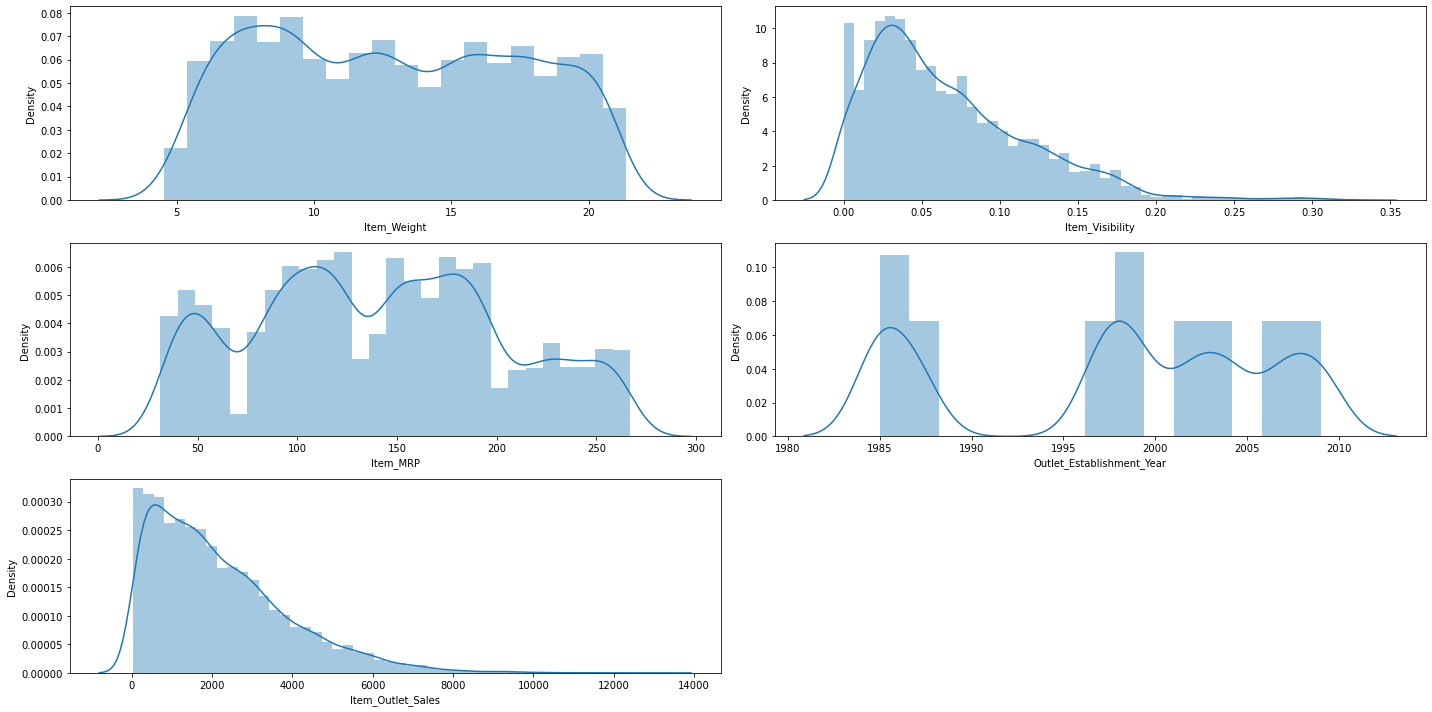

In [16]:
import matplotlib.pyplot as plt
# for warnings
import warnings
warnings.filterwarnings('ignore')
#Plot dimension
plt.rcParams['figure.figsize']=[20,10]

n_rows=3
n_cols=2
counter=1
for i in nums:
    plt.subplot(n_rows,n_cols,counter) # Creating the space for 6 plots so the plots can be shown 
    sns.distplot(sales.loc[:,i].dropna()) # command for creating distplot using loop, i is iterating through the columns
                                          #.dropna()is used to drop the missing values in the columns
    counter+=1
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

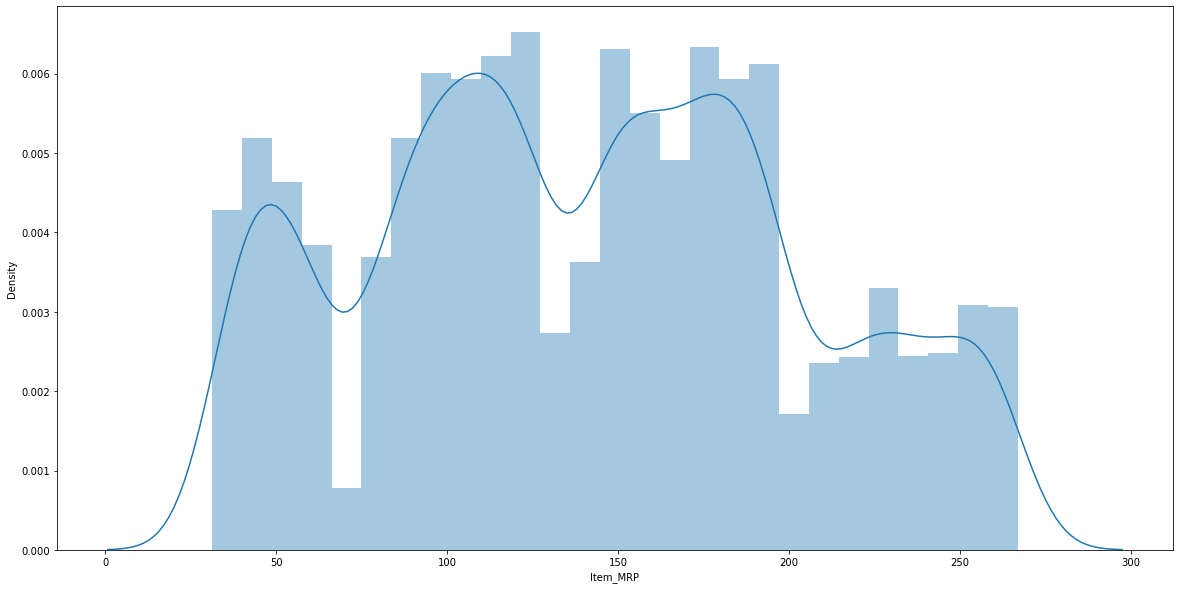

In [17]:
sns.distplot(sales.loc[:,'Item_MRP'])

In [18]:
# This is a mutimodal data Because there are multiple modes of the product


# Inferences

In [19]:
#1.Item outlet sales is positively skewed in nature
#2.No pattern sen in outlet EST year
#3.Item MRP is found to be multimodal in nature.
#4.Item weight is uniform in nature

In [20]:
# Plotting the categorical column

In [21]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


<AxesSubplot:>

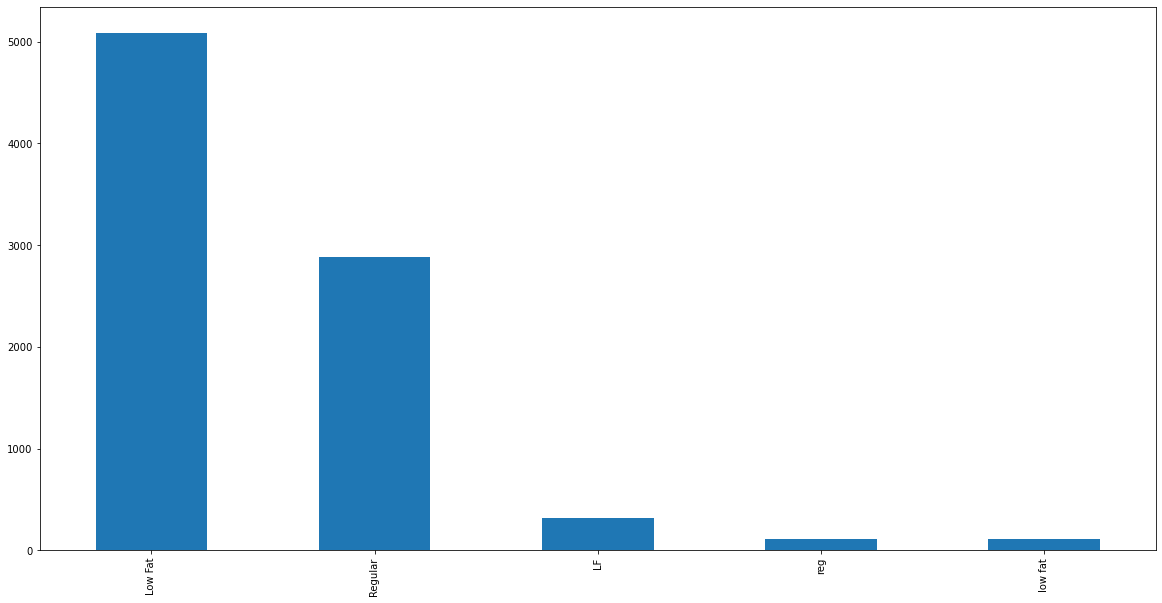

In [22]:
# Item fat content
sales.Item_Fat_Content.value_counts().plot(kind='bar')

In [23]:
# replace the LF and REg in their respective categories

In [24]:
sales.Item_Fat_Content.replace(to_replace=['LF','low fat','reg'],value=['Low Fat','Low Fat','Regular'],inplace=True)

<AxesSubplot:>

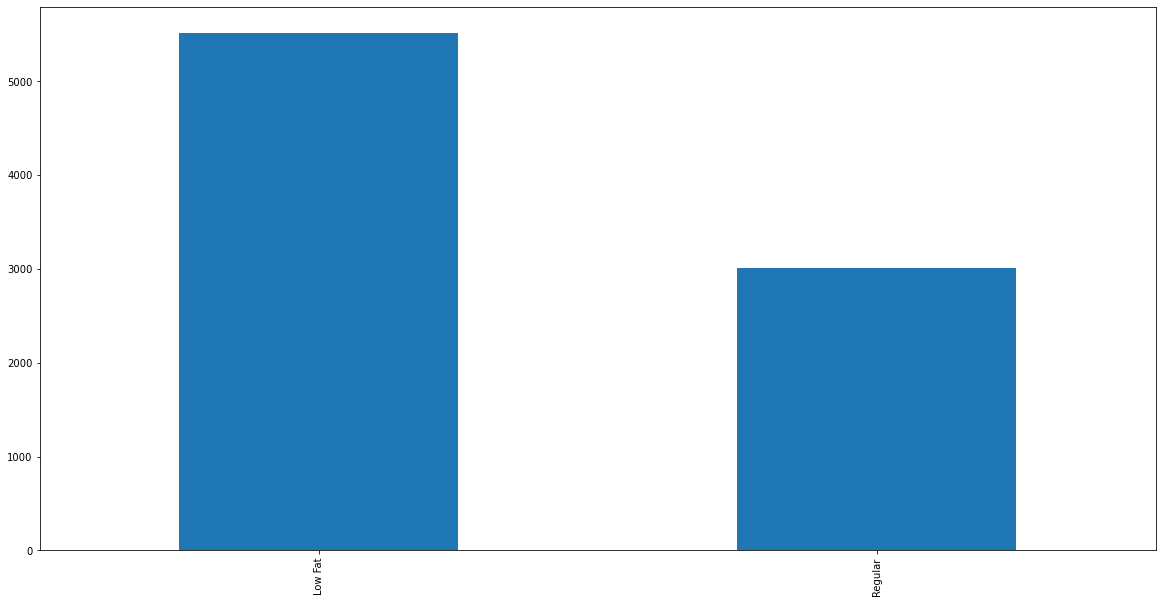

In [25]:
sales.Item_Fat_Content.value_counts().plot(kind='bar')

In [26]:
# Item Type 

<AxesSubplot:>

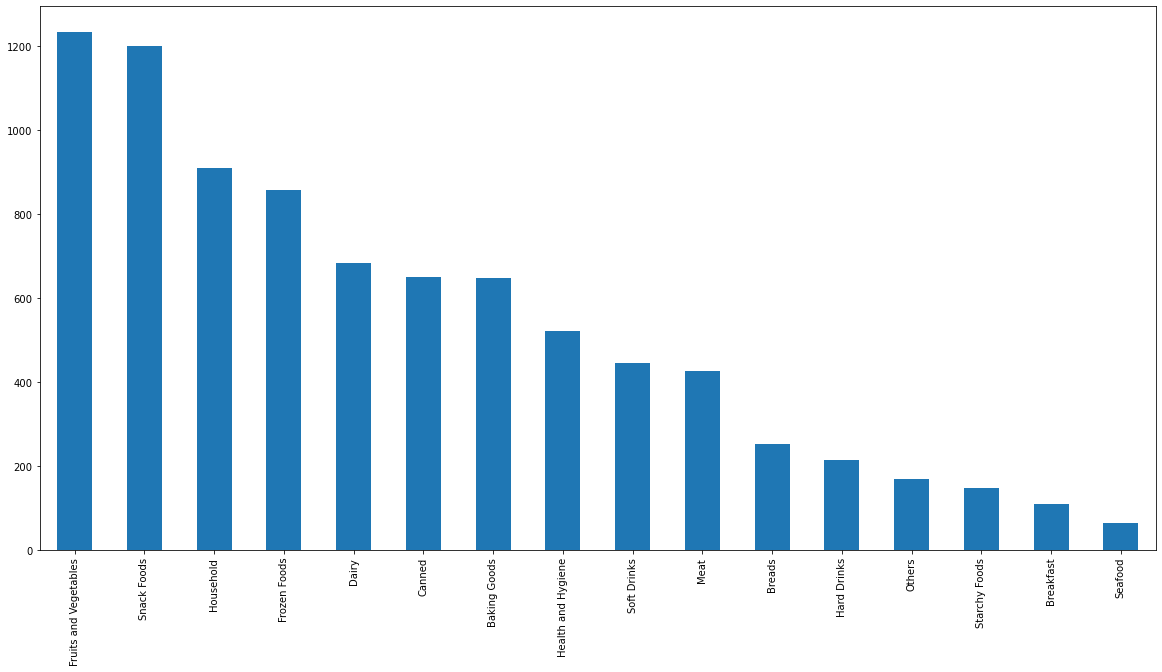

In [27]:
sales.Item_Type.value_counts().plot(kind='bar')

In [28]:
sales.Item_Type.value_counts().index

Index(['Fruits and Vegetables', 'Snack Foods', 'Household', 'Frozen Foods',
       'Dairy', 'Canned', 'Baking Goods', 'Health and Hygiene', 'Soft Drinks',
       'Meat', 'Breads', 'Hard Drinks', 'Others', 'Starchy Foods', 'Breakfast',
       'Seafood'],
      dtype='object')

# Infrence :
 Top 5 selling product types are :
 'Fruits and Vegetables',
'Snack Foods', 
'Household', 
'Frozen Foods',
'Dairy'
       

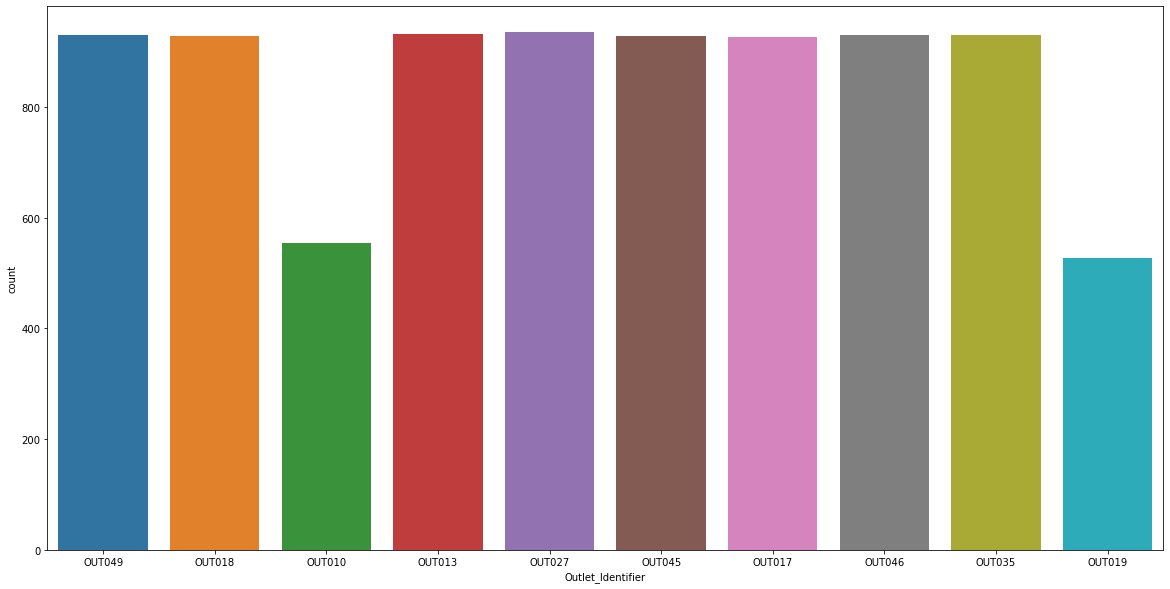

In [29]:
# Outlet_id
sns.countplot(sales.Outlet_Identifier)
plt.show()

# HYPOTHESIS: the outlet 10 and outlet 19 has the lowest sales as compare to the other outlets 

In [30]:
# we will check our hypothesis 

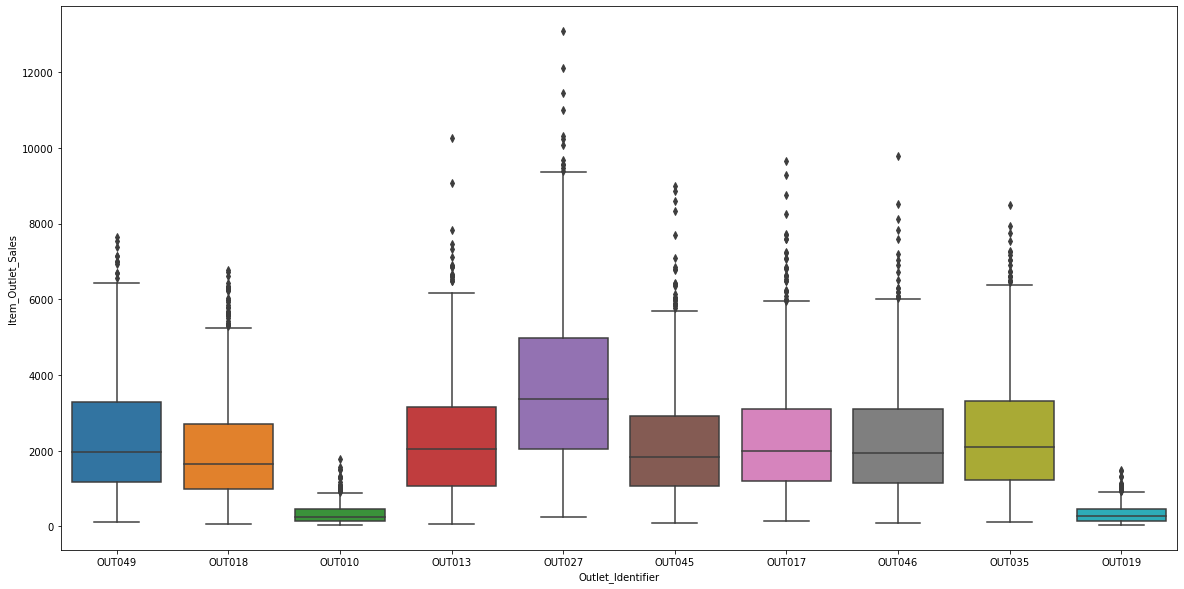

In [31]:
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=sales)
plt.show()

# NOTE  If the frequency is less then the effect on the target variable is also less

In [32]:
# Most performing outlet is outlet 27

In [33]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [34]:
# OUTLET SIZE

In [35]:
sales.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

<AxesSubplot:>

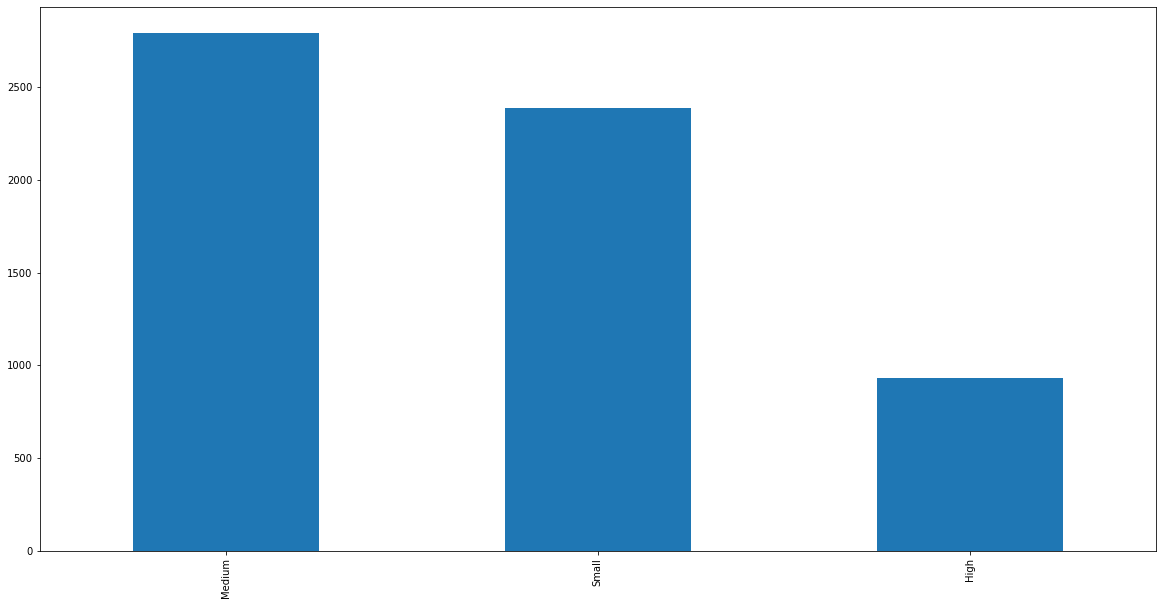

In [36]:
sales.Outlet_Size.value_counts().plot(kind='bar')

<AxesSubplot:>

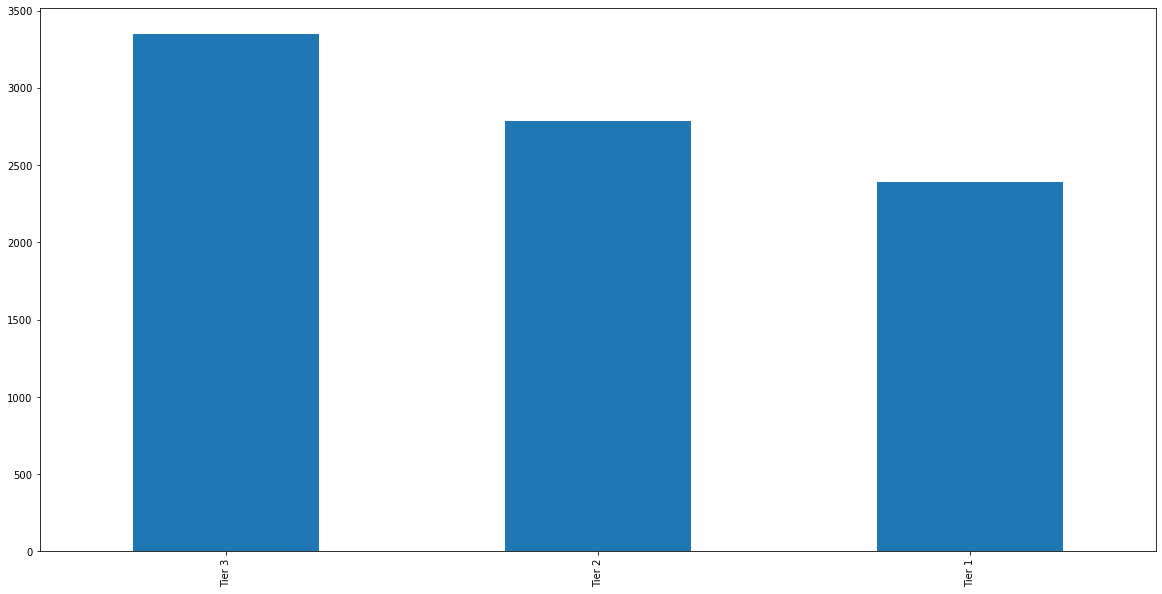

In [37]:
sales.Outlet_Location_Type.value_counts().plot(kind='bar')

In [38]:
# Infrence : The company sales are mostly driven from the TIER 3 type of cities
 # The medium type stores drive the most of sales and profit 

In [39]:
# Outlet_Type

In [40]:
sales.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

# SUMMARY

# Out 27 is the maximum revenue genrator for the buisness
# We relaize this stores is the mostly opened in Tier 3 cities and the type of the outlet is medium size outlet
# The items that are sold in the outlet are fruits and veggies,snacks,frozen, household followed by diary
# Most of the items are genrally low fat and regular types 
# The lowest performing outelets are out10 and out19 
# super market type 1 appear the most commonly seen outlet across the the locations 
# 

# BIVARIATE ANALYSIS:

In [41]:
# NUM vs NUM 
# CAT vs NUM
# CAT vs CAT


In [42]:
nums

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [43]:
# NUM vs NUM 
# Item weight vs sales 


<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

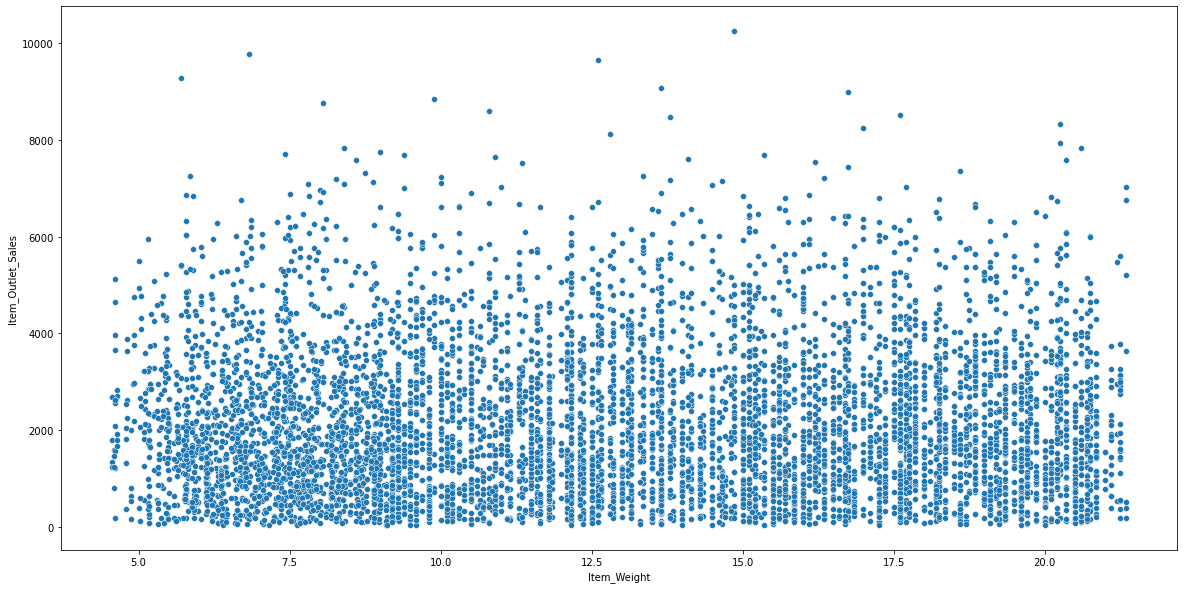

In [44]:
sns.scatterplot(sales.Item_Weight,sales.Item_Outlet_Sales)
# NO pattern with sales 

In [45]:
# Check the correlation  between sales and weight 
sales.loc[:,['Item_Weight','Item_Outlet_Sales']].corr()
# There is no correlation between both the variables 

,Item_Weight,Item_Outlet_Sales
Item_Weight,1.000000,0.014123
Item_Outlet_Sales,0.014123,1.000000


In [46]:
# Item MRP vs sales

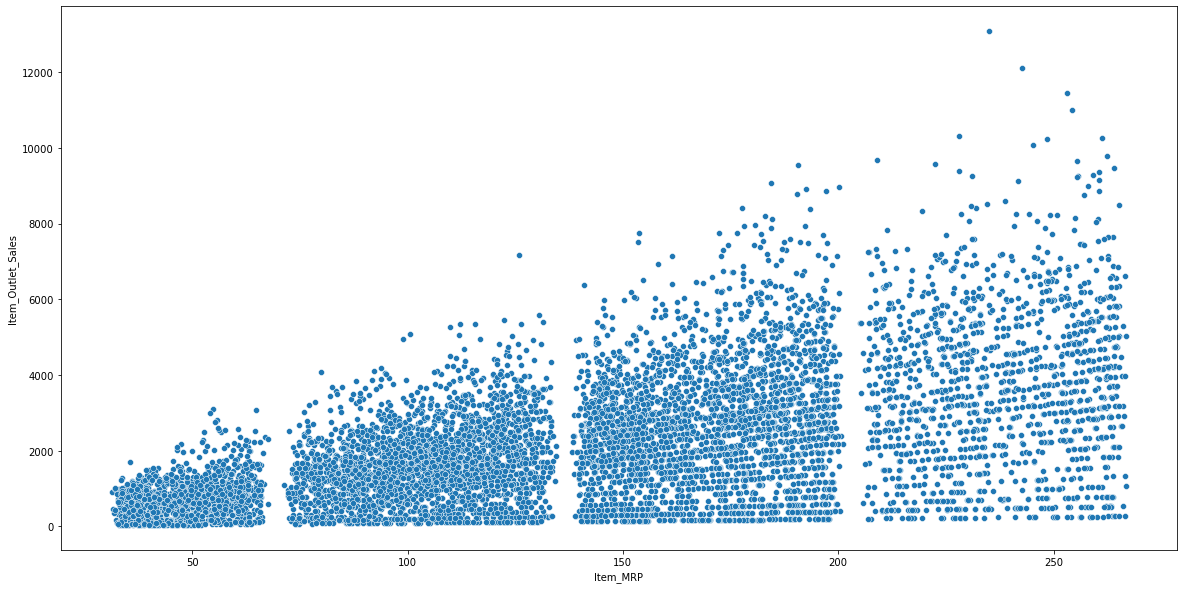

In [47]:
sns.scatterplot(sales.Item_MRP,sales.Item_Outlet_Sales)
plt.show()
# This is creating a pseduo effect and showing false pattern 

In [48]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


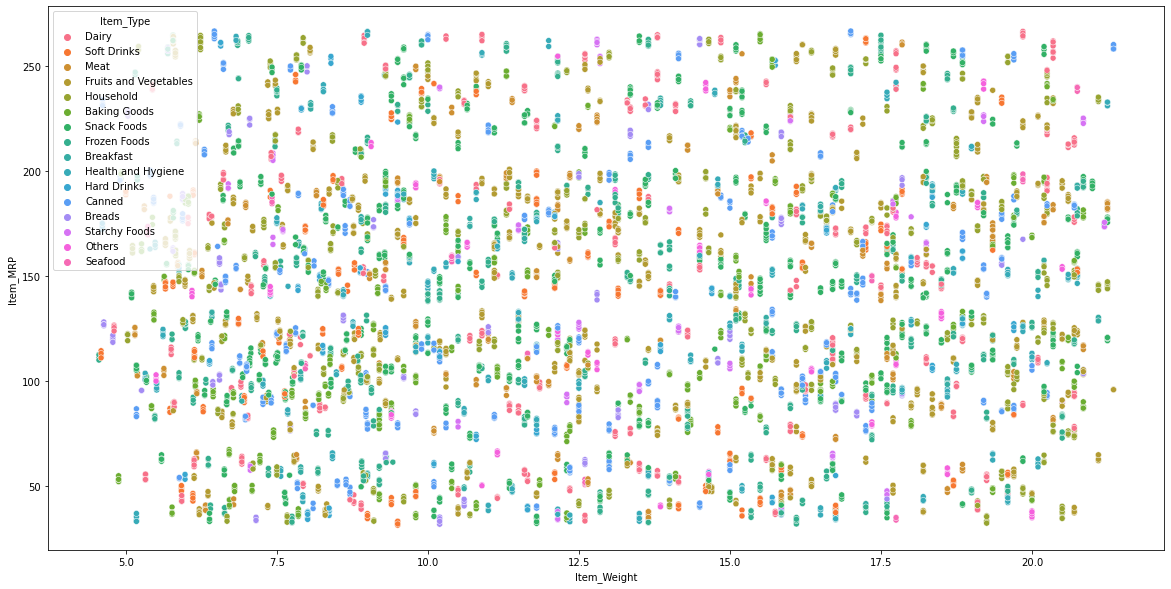

In [49]:
sns.scatterplot(sales.Item_Weight,sales.Item_MRP,hue=sales.Item_Type)
plt.show()

In [50]:
# Visibilty vs Sales 

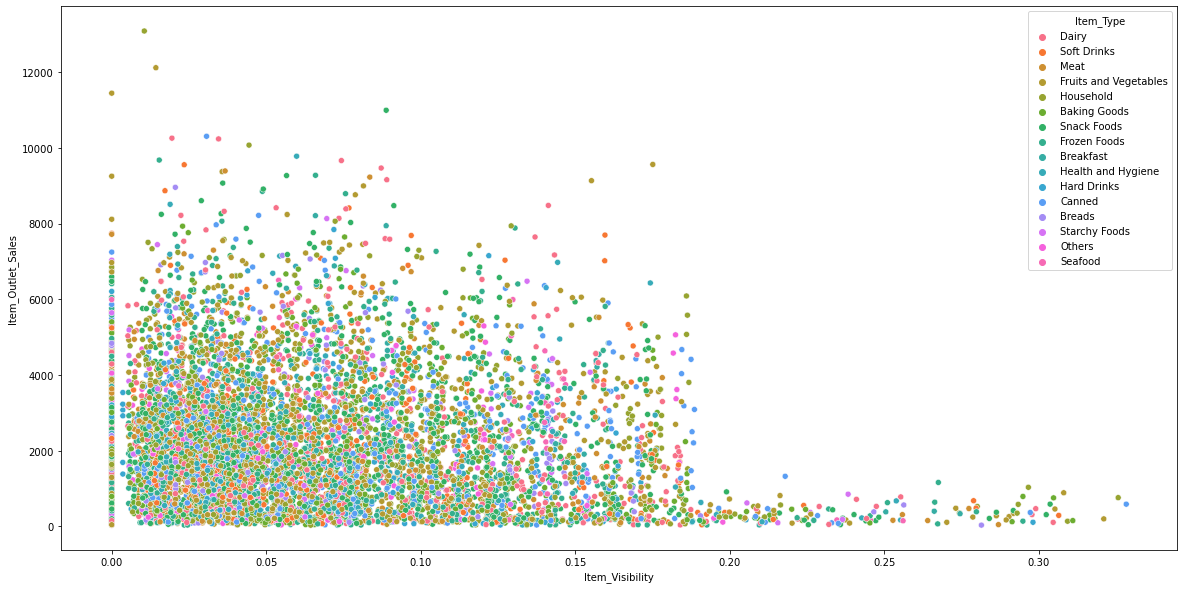

In [51]:
sns.scatterplot(sales.Item_Visibility,sales.Item_Outlet_Sales,hue=sales.Item_Type)
plt.show()

# Infrence of Bivariate analysis (Num vs Num variable)

In [52]:
# Item visibility vs sales show that as the visibilty increases the sales decraeses 
# Item MRP vs Sales show 4 clusters & correlation is also good 


In [53]:
nums

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [54]:
sales.loc[:,nums].corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


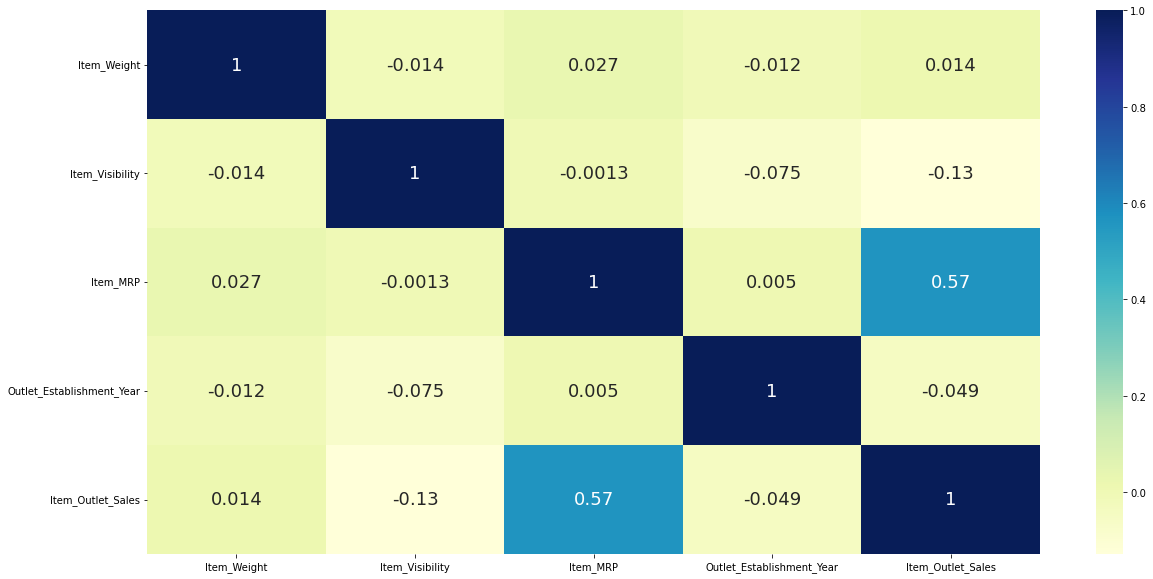

In [55]:
sns.heatmap(sales.loc[:,nums].corr(),annot=True,cmap='YlGnBu',annot_kws={'size':18})
plt.show()

In [56]:
# Cat Vs NUM
# Item Type vs sales

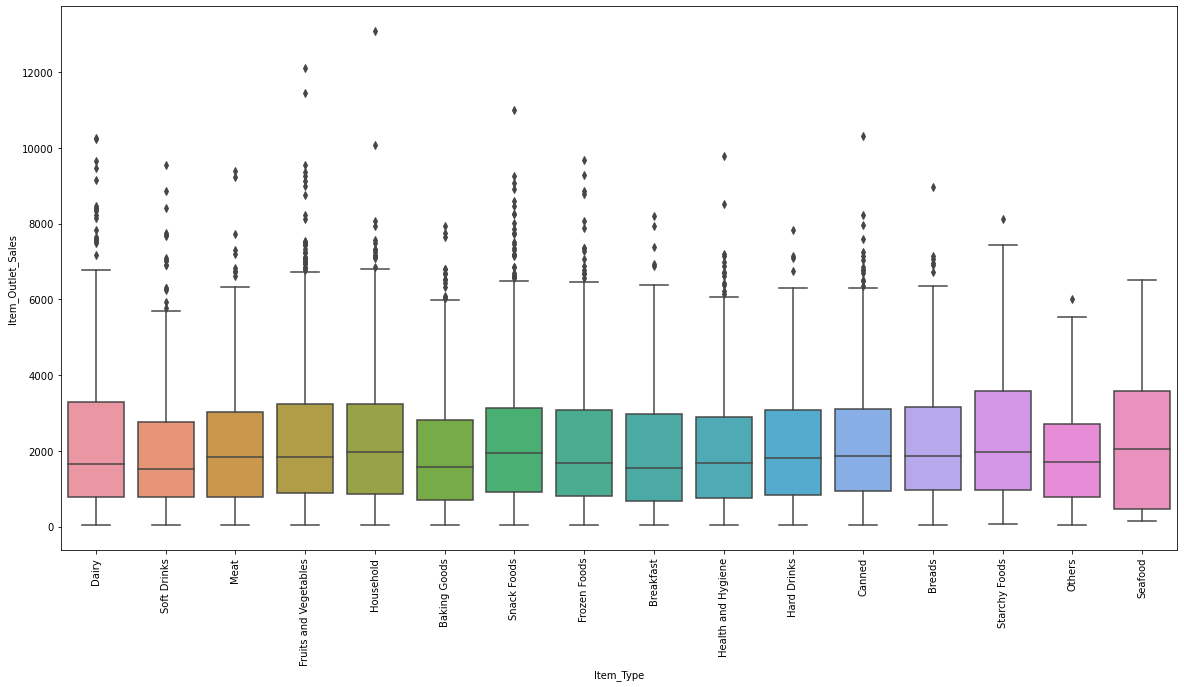

In [57]:
sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',data=sales)
plt.xticks(rotation=90)
plt.show()

In [58]:
# Lets see seafood 


In [59]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


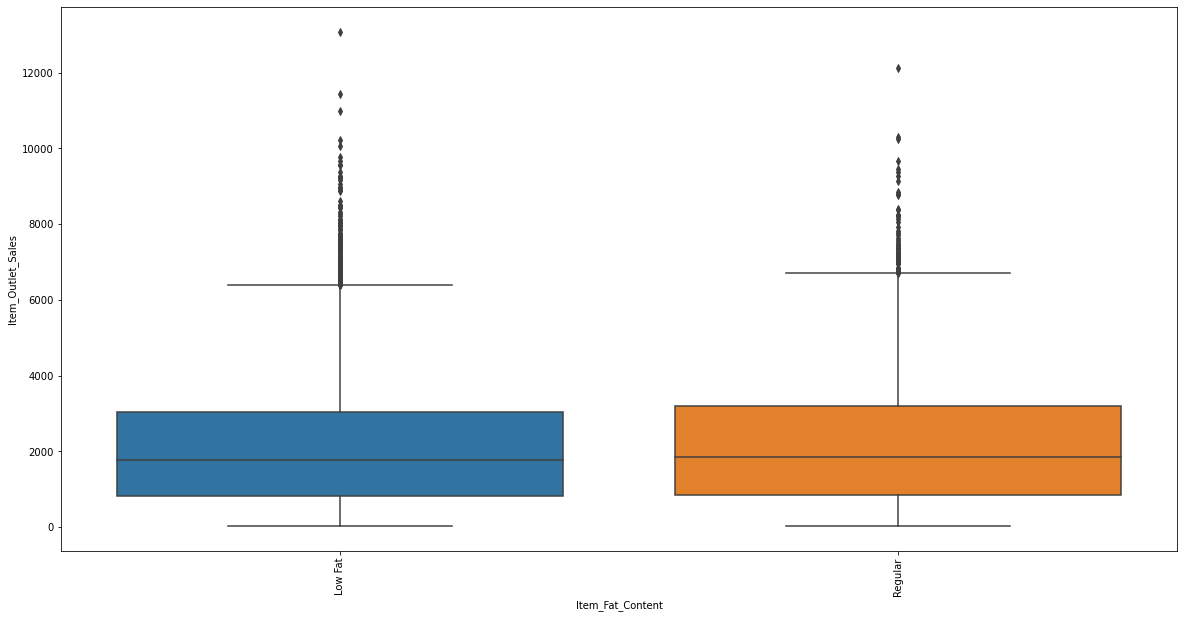

In [60]:
sns.boxplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=sales)
plt.xticks(rotation=90)
plt.show()

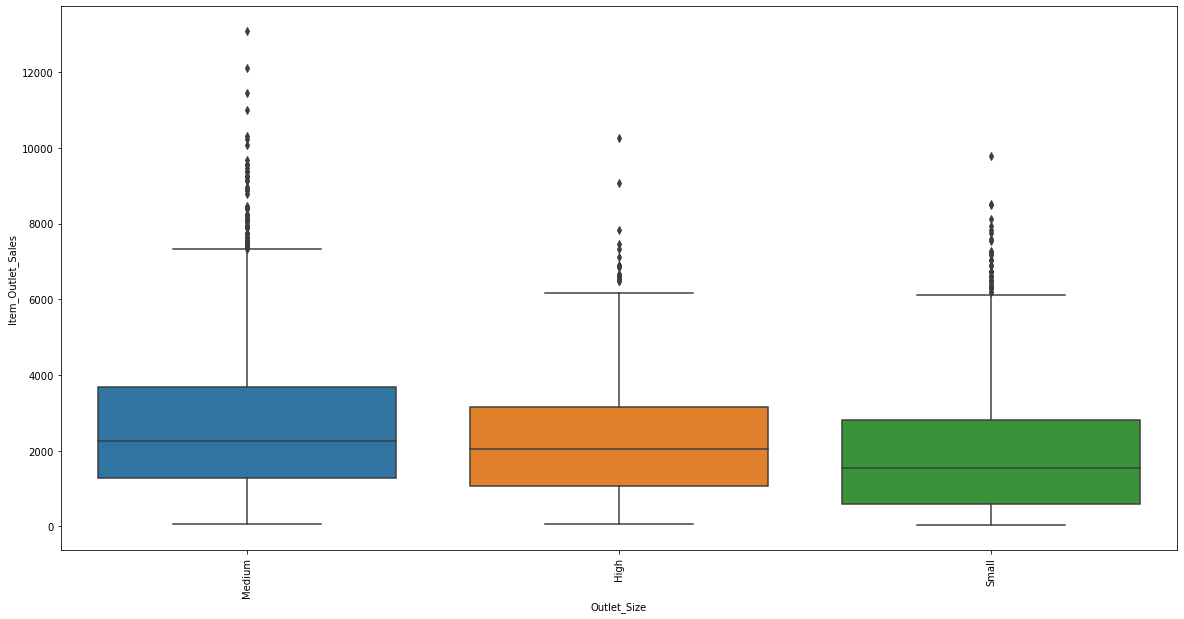

In [61]:
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data=sales)
plt.xticks(rotation=90)
plt.show()

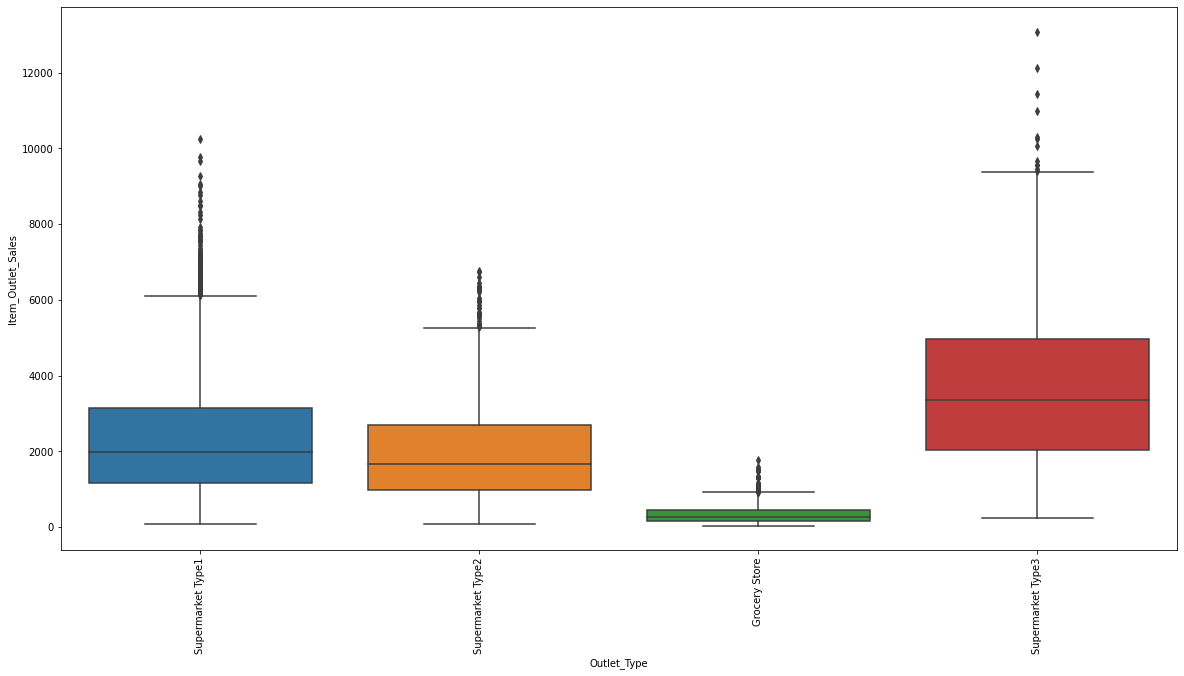

In [62]:
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',data=sales)
plt.xticks(rotation=90)
plt.show()

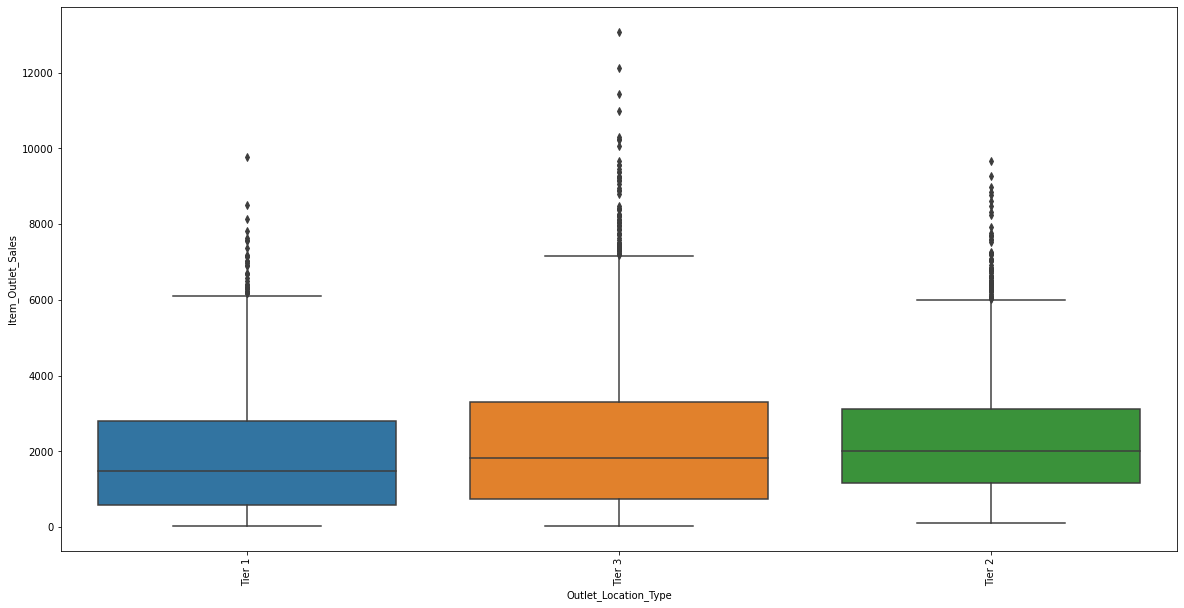

In [63]:
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=sales)
plt.xticks(rotation=90)
plt.show()

In [64]:
# Infrences of Bivariate anaylsis:
# supermaket type 3 stores has the maximum sales for the business and followed by the super market type 1 
# Grocery store type has the minimum sales out of all the type of outlets 
# The most of the sales are derived from Tier 3 type of location for business 
# Medium size outlets derrives the maximum sales out of all 
# Low Fat products are more likely to sold out as compare to regular one 


In [65]:
cat=sales.select_dtypes(include='object').columns

In [66]:
cat

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

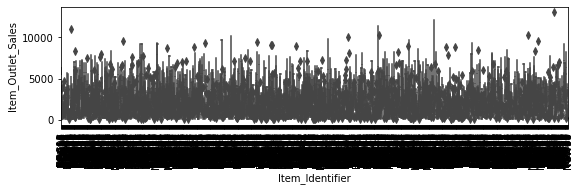

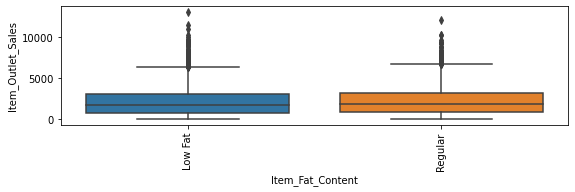

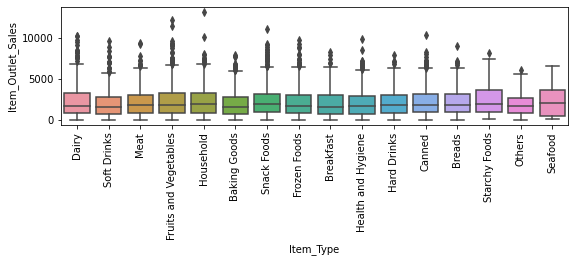

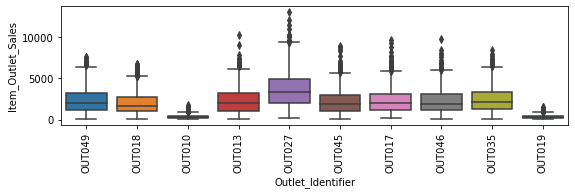

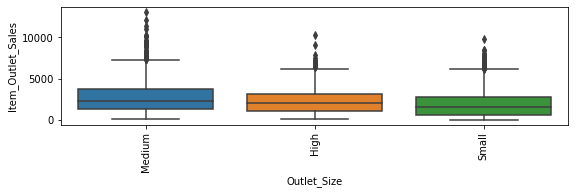

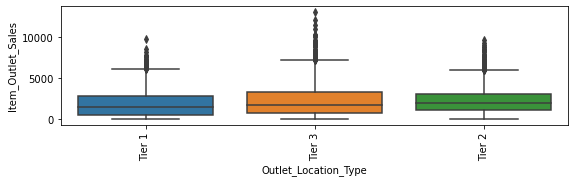

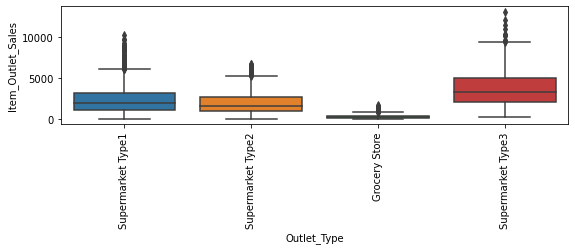

In [67]:

plt.rcParams['figure.figsize']=[20,10]
n_rows=4
n_cols=2
counter=1
for i in cat:
    plt.subplot(n_rows,n_cols,counter)
    sns.boxplot(x=i,y='Item_Outlet_Sales',data=sales)
    plt.xticks(rotation=90)
    plt.show()
    counter+=1
    

# ### Feature Engineering

In [68]:
sales

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [69]:
sales.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [70]:
sales['Id_Item_Cat']=sales.Item_Identifier.str[0:2]

In [71]:
sales.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [72]:
# fixing the Item Fat content 
# The column is already fixed  in uppere rows


In [73]:
# We need to change the category of NC into a new category 

In [74]:
sales.loc[sales.Id_Item_Cat=='NC','Item_Fat_Content']='Non Edible'

In [75]:
# Creating categories perishable and non persihable

In [76]:
perish=['Dairy', 'Meat', 'Fruits and Vegetables','Breakfast',  
       'Breads', 'Starchy Foods',  'Seafood']

In [77]:
def perishkardo(x):
    if x in perish:
        return('Perishable')
    else:
        return('Non Perishable')

In [78]:
sales['Item_cat']=sales.Item_Type.apply(perishkardo)

In [79]:
# Lets talk about outlet Id
# binning the outlet id into three categories

In [80]:
lowes =["OUT010", "OUT019"]
high =["OUT013", "OUT027"]


def outlets(x):
    if x in lowes:
        return("Low_performers")
    elif x in high:
        return("high_performers")
    else: 
        return("Avg_performers") 
    
    
sales["Out_Cat"]=sales.Outlet_Identifier.apply(outlets)

In [81]:
sales

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Id_Item_Cat,Item_cat,Out_Cat
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishable,Avg_performers
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non Perishable,Avg_performers
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perishable,Avg_performers
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,FD,Perishable,Low_performers
4,NCD19,8.930,Non Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,Non Perishable,high_performers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,FD,Non Perishable,high_performers
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,FD,Non Perishable,Avg_performers
8520,NCJ29,10.600,Non Edible,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,NC,Non Perishable,Avg_performers
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,FD,Non Perishable,Avg_performers


In [82]:
# establishment Year
sales['vintage']=2013-sales.Outlet_Establishment_Year

In [83]:
sales

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Id_Item_Cat,Item_cat,Out_Cat,vintage
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishable,Avg_performers,14
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non Perishable,Avg_performers,4
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perishable,Avg_performers,14
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,FD,Perishable,Low_performers,15
4,NCD19,8.930,Non Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,Non Perishable,high_performers,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,FD,Non Perishable,high_performers,26
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,FD,Non Perishable,Avg_performers,11
8520,NCJ29,10.600,Non Edible,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,NC,Non Perishable,Avg_performers,9
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,FD,Non Perishable,Avg_performers,4


In [84]:
sales

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Id_Item_Cat,Item_cat,Out_Cat,vintage
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishable,Avg_performers,14
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non Perishable,Avg_performers,4
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perishable,Avg_performers,14
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,FD,Perishable,Low_performers,15
4,NCD19,8.930,Non Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,Non Perishable,high_performers,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,FD,Non Perishable,high_performers,26
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,FD,Non Perishable,Avg_performers,11
8520,NCJ29,10.600,Non Edible,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,NC,Non Perishable,Avg_performers,9
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,FD,Non Perishable,Avg_performers,4


# Missing Values

In [85]:
sales.loc[sales.Item_Identifier=='FDA15'] # Item weight has the missing values and it is dependent on Item identifier

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Id_Item_Cat,Item_cat,Out_Cat,vintage
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishable,Avg_performers,14
831,FDA15,9.3,Low Fat,0.016055,Dairy,250.2092,OUT045,2002,NaN,Tier 2,Supermarket Type1,5976.2208,FD,Perishable,Avg_performers,11
2599,FDA15,9.3,Low Fat,0.016019,Dairy,248.5092,OUT035,2004,Small,Tier 2,Supermarket Type1,6474.2392,FD,Perishable,Avg_performers,9
2643,FDA15,9.3,Low Fat,0.016088,Dairy,249.6092,OUT018,2009,Medium,Tier 3,Supermarket Type2,5976.2208,FD,Perishable,Avg_performers,4
4874,FDA15,9.3,Low Fat,0.026818,Dairy,248.9092,OUT010,1998,NaN,Tier 3,Grocery Store,498.0184,FD,Perishable,Low_performers,15
5413,FDA15,9.3,Low Fat,0.016009,Dairy,250.6092,OUT013,1987,High,Tier 3,Supermarket Type1,6474.2392,FD,Perishable,high_performers,26
6696,FDA15,NaN,Low Fat,0.015945,Dairy,249.5092,OUT027,1985,Medium,Tier 3,Supermarket Type3,6474.2392,FD,Perishable,high_performers,28
7543,FDA15,9.3,Low Fat,0.016113,Dairy,248.8092,OUT017,2007,NaN,Tier 2,Supermarket Type1,5976.2208,FD,Perishable,Avg_performers,6


In [86]:
# so we will take the Item Identifier to replace the missing value 

In [87]:
# There are two functions in fillna()
# 1.fflill() # forward row filling
# 2.bfill()  # backward row filling 

In [88]:
sales['Item_Weight']=sales.groupby('Item_Identifier')['Item_Weight'].transform(lambda x:x.fillna(x.mean()))

In [89]:
sales.loc[sales.Item_Weight.isnull()] # These are the single entries so the mean is not there 
# so the fill na method did not work 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Id_Item_Cat,Item_cat,Out_Cat,vintage
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564,FD,Non Perishable,high_performers,28
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280,FD,Non Perishable,high_performers,28
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046,FD,Perishable,high_performers,28
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098,FD,Non Perishable,Low_performers,28


In [90]:
print(sales.loc[sales.Item_Type=='Frozen Foods','Item_Weight'].mean())
print(sales.loc[sales.Item_Type=='Snack Foods','Item_Weight'].mean())
print(sales.loc[sales.Item_Type=='Dairy','Item_Weight'].mean())
print(sales.loc[sales.Item_Type=='Baking Goods','Item_Weight'].mean())

12.782403508771965
13.031230191826587
13.37990455212926
12.28531684698612


In [91]:
sales.loc[(sales.Item_Type=='Frozen Foods')&(sales.Item_Weight.isnull()),'Item_Weight']=12.7824

In [92]:
sales.loc[(sales.Item_Type=='Snack Foods')&(sales.Item_Weight.isnull()),'Item_Weight']=13.0312

In [93]:
sales.loc[(sales.Item_Type=='Dairy')&(sales.Item_Weight.isnull()),'Item_Weight']=13.3799

In [94]:
sales.loc[(sales.Item_Type=='Baking Goods')&(sales.Item_Weight.isnull()),'Item_Weight']=12.2853

In [95]:
sales.groupby(['Outlet_Location_Type','Outlet_Type'])['Outlet_Size'].value_counts()

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small          528
                      Supermarket Type1  Medium         930
                                         Small          930
Tier 2                Supermarket Type1  Small          930
Tier 3                Supermarket Type1  High           932
                      Supermarket Type2  Medium         928
                      Supermarket Type3  Medium         935
Name: Outlet_Size, dtype: int64

In [96]:
sales.loc[sales.Outlet_Size.isnull(),['Outlet_Location_Type','Outlet_Type']].value_counts()

Outlet_Location_Type  Outlet_Type      
Tier 2                Supermarket Type1    1855
Tier 3                Grocery Store         555
dtype: int64

In [97]:
sales.loc[sales.Outlet_Size.isnull(),'Outlet_Size']='Medium'

# Scaling

In [98]:
sales

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Id_Item_Cat,Item_cat,Out_Cat,vintage
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishable,Avg_performers,14
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non Perishable,Avg_performers,4
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perishable,Avg_performers,14
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,FD,Perishable,Low_performers,15
4,NCD19,8.930,Non Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,Non Perishable,high_performers,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,FD,Non Perishable,high_performers,26
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,FD,Non Perishable,Avg_performers,11
8520,NCJ29,10.600,Non Edible,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,NC,Non Perishable,Avg_performers,9
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,FD,Non Perishable,Avg_performers,4


In [99]:
sales.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Id_Item_Cat', 'Item_cat',
       'Out_Cat', 'vintage'],
      dtype='object')

In [100]:
# Drop the unnecessary variables 

In [101]:
Finaldata=sales.drop(['Item_Identifier', 
       'Item_Type', 'Outlet_Identifier',
       'Outlet_Establishment_Year'],axis=1)

In [102]:
Finaldata

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Id_Item_Cat,Item_cat,Out_Cat,vintage
0,9.300,Low Fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishable,Avg_performers,14
1,5.920,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non Perishable,Avg_performers,4
2,17.500,Low Fat,0.016760,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perishable,Avg_performers,14
3,19.200,Regular,0.000000,182.0950,Medium,Tier 3,Grocery Store,732.3800,FD,Perishable,Low_performers,15
4,8.930,Non Edible,0.000000,53.8614,High,Tier 3,Supermarket Type1,994.7052,NC,Non Perishable,high_performers,26
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,214.5218,High,Tier 3,Supermarket Type1,2778.3834,FD,Non Perishable,high_performers,26
8519,8.380,Regular,0.046982,108.1570,Medium,Tier 2,Supermarket Type1,549.2850,FD,Non Perishable,Avg_performers,11
8520,10.600,Non Edible,0.035186,85.1224,Small,Tier 2,Supermarket Type1,1193.1136,NC,Non Perishable,Avg_performers,9
8521,7.210,Regular,0.145221,103.1332,Medium,Tier 3,Supermarket Type2,1845.5976,FD,Non Perishable,Avg_performers,4


In [103]:
from sklearn.preprocessing import StandardScaler


In [104]:
sc=StandardScaler()
Finaldata['scaled_sales']=sc.fit_transform(pd.DataFrame(Finaldata.Item_Outlet_Sales))

In [105]:
sc=StandardScaler()
Finaldata['scaled_mrp']=sc.fit_transform(pd.DataFrame(Finaldata.Item_MRP))

In [106]:
sc=StandardScaler()
Finaldata['scaled_Weight']=sc.fit_transform(pd.DataFrame(Finaldata.Item_Weight))

In [107]:
sc=StandardScaler()
Finaldata['scaled_visible']=sc.fit_transform(pd.DataFrame(Finaldata.Item_Visibility))

In [108]:
sc=StandardScaler()
Finaldata['scaled_vintage']=sc.fit_transform(pd.DataFrame(Finaldata.vintage))

In [109]:
Finaldata

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Id_Item_Cat,Item_cat,Out_Cat,vintage,scaled_sales,scaled_mrp,scaled_Weight,scaled_visible,scaled_vintage
0,9.300,Low Fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishable,Avg_performers,14,0.910601,1.747454,-0.769777,-0.970732,-0.139541
1,5.920,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non Perishable,Avg_performers,4,-1.018440,-1.489023,-1.497482,-0.908111,-1.334103
2,17.500,Low Fat,0.016760,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perishable,Avg_performers,14,-0.049238,0.010040,0.995659,-0.956917,-0.139541
3,19.200,Regular,0.000000,182.0950,Medium,Tier 3,Grocery Store,732.3800,FD,Perishable,Low_performers,15,-0.849103,0.660050,1.361665,-1.281758,-0.020085
4,8.930,Non Edible,0.000000,53.8614,High,Tier 3,Supermarket Type1,994.7052,NC,Non Perishable,high_performers,26,-0.695373,-1.399220,-0.849437,-1.281758,1.293934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,214.5218,High,Tier 3,Supermarket Type1,2778.3834,FD,Non Perishable,high_performers,26,0.349915,1.180783,-1.294026,-0.181193,1.293934
8519,8.380,Regular,0.046982,108.1570,Medium,Tier 2,Supermarket Type1,549.2850,FD,Non Perishable,Avg_performers,11,-0.956402,-0.527301,-0.967851,-0.371154,-0.497909
8520,10.600,Non Edible,0.035186,85.1224,Small,Tier 2,Supermarket Type1,1193.1136,NC,Non Perishable,Avg_performers,9,-0.579100,-0.897208,-0.489891,-0.599784,-0.736822
8521,7.210,Regular,0.145221,103.1332,Medium,Tier 3,Supermarket Type2,1845.5976,FD,Non Perishable,Avg_performers,4,-0.196725,-0.607977,-1.219748,1.532880,-1.334103


In [110]:
# Lets drop the orignal values 

In [111]:
newdata=Finaldata.drop(['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales','vintage'],axis=1)

In [112]:
newdata

,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type,Id_Item_Cat,Item_cat,Out_Cat,scaled_sales,scaled_mrp,scaled_Weight,scaled_visible,scaled_vintage
0,Low Fat,Medium,Tier 1,Supermarket Type1,FD,Perishable,Avg_performers,0.910601,1.747454,-0.769777,-0.970732,-0.139541
1,Regular,Medium,Tier 3,Supermarket Type2,DR,Non Perishable,Avg_performers,-1.018440,-1.489023,-1.497482,-0.908111,-1.334103
2,Low Fat,Medium,Tier 1,Supermarket Type1,FD,Perishable,Avg_performers,-0.049238,0.010040,0.995659,-0.956917,-0.139541
3,Regular,Medium,Tier 3,Grocery Store,FD,Perishable,Low_performers,-0.849103,0.660050,1.361665,-1.281758,-0.020085
4,Non Edible,High,Tier 3,Supermarket Type1,NC,Non Perishable,high_performers,-0.695373,-1.399220,-0.849437,-1.281758,1.293934
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,Low Fat,High,Tier 3,Supermarket Type1,FD,Non Perishable,high_performers,0.349915,1.180783,-1.294026,-0.181193,1.293934
8519,Regular,Medium,Tier 2,Supermarket Type1,FD,Non Perishable,Avg_performers,-0.956402,-0.527301,-0.967851,-0.371154,-0.497909
8520,Non Edible,Small,Tier 2,Supermarket Type1,NC,Non Perishable,Avg_performers,-0.579100,-0.897208,-0.489891,-0.599784,-0.736822
8521,Regular,Medium,Tier 3,Supermarket Type2,FD,Non Perishable,Avg_performers,-0.196725,-0.607977,-1.219748,1.532880,-1.334103


In [113]:
# Scaling the Outlet size 

In [114]:
newdata['Outlet_Size']=newdata.Outlet_Size.map({'Small':1,'Medium':2,'High':3})

In [115]:
newdata.describe(include ="object")

,Item_Fat_Content,Outlet_Location_Type,Outlet_Type,Id_Item_Cat,Item_cat,Out_Cat
count,8523,8523,8523,8523,8523,8523
unique,3,3,4,3,2,3
top,Low Fat,Tier 3,Supermarket Type1,FD,Non Perishable,Avg_performers
freq,3918,3350,5577,6125,5611,5573


In [116]:
newdata

,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type,Id_Item_Cat,Item_cat,Out_Cat,scaled_sales,scaled_mrp,scaled_Weight,scaled_visible,scaled_vintage
0,Low Fat,2,Tier 1,Supermarket Type1,FD,Perishable,Avg_performers,0.910601,1.747454,-0.769777,-0.970732,-0.139541
1,Regular,2,Tier 3,Supermarket Type2,DR,Non Perishable,Avg_performers,-1.018440,-1.489023,-1.497482,-0.908111,-1.334103
2,Low Fat,2,Tier 1,Supermarket Type1,FD,Perishable,Avg_performers,-0.049238,0.010040,0.995659,-0.956917,-0.139541
3,Regular,2,Tier 3,Grocery Store,FD,Perishable,Low_performers,-0.849103,0.660050,1.361665,-1.281758,-0.020085
4,Non Edible,3,Tier 3,Supermarket Type1,NC,Non Perishable,high_performers,-0.695373,-1.399220,-0.849437,-1.281758,1.293934
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,Low Fat,3,Tier 3,Supermarket Type1,FD,Non Perishable,high_performers,0.349915,1.180783,-1.294026,-0.181193,1.293934
8519,Regular,2,Tier 2,Supermarket Type1,FD,Non Perishable,Avg_performers,-0.956402,-0.527301,-0.967851,-0.371154,-0.497909
8520,Non Edible,1,Tier 2,Supermarket Type1,NC,Non Perishable,Avg_performers,-0.579100,-0.897208,-0.489891,-0.599784,-0.736822
8521,Regular,2,Tier 3,Supermarket Type2,FD,Non Perishable,Avg_performers,-0.196725,-0.607977,-1.219748,1.532880,-1.334103


In [117]:
dummydata=pd.get_dummies(newdata, drop_first=True)

In [118]:
dummydata

,Outlet_Size,scaled_sales,scaled_mrp,scaled_Weight,scaled_visible,scaled_vintage,Item_Fat_Content_Non Edible,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Id_Item_Cat_FD,Id_Item_Cat_NC,Item_cat_Perishable,Out_Cat_Low_performers,Out_Cat_high_performers
0,2,0.910601,1.747454,-0.769777,-0.970732,-0.139541,0,0,0,0,1,0,0,1,0,1,0,0
1,2,-1.018440,-1.489023,-1.497482,-0.908111,-1.334103,0,1,0,1,0,1,0,0,0,0,0,0
2,2,-0.049238,0.010040,0.995659,-0.956917,-0.139541,0,0,0,0,1,0,0,1,0,1,0,0
3,2,-0.849103,0.660050,1.361665,-1.281758,-0.020085,0,1,0,1,0,0,0,1,0,1,1,0
4,3,-0.695373,-1.399220,-0.849437,-1.281758,1.293934,1,0,0,1,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,3,0.349915,1.180783,-1.294026,-0.181193,1.293934,0,0,0,1,1,0,0,1,0,0,0,1
8519,2,-0.956402,-0.527301,-0.967851,-0.371154,-0.497909,0,1,1,0,1,0,0,1,0,0,0,0
8520,1,-0.579100,-0.897208,-0.489891,-0.599784,-0.736822,1,0,1,0,1,0,0,0,1,0,0,0
8521,2,-0.196725,-0.607977,-1.219748,1.532880,-1.334103,0,1,0,1,0,1,0,1,0,0,0,0


In [121]:
dummydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Outlet_Size                    8523 non-null   int64  
 1   scaled_sales                   8523 non-null   float64
 2   scaled_mrp                     8523 non-null   float64
 3   scaled_Weight                  8523 non-null   float64
 4   scaled_visible                 8523 non-null   float64
 5   scaled_vintage                 8523 non-null   float64
 6   Item_Fat_Content_Non Edible    8523 non-null   uint8  
 7   Item_Fat_Content_Regular       8523 non-null   uint8  
 8   Outlet_Location_Type_Tier 2    8523 non-null   uint8  
 9   Outlet_Location_Type_Tier 3    8523 non-null   uint8  
 10  Outlet_Type_Supermarket Type1  8523 non-null   uint8  
 11  Outlet_Type_Supermarket Type2  8523 non-null   uint8  
 12  Outlet_Type_Supermarket Type3  8523 non-null   u

In [127]:
y=Finaldata["Item_Outlet_Sales"]
x=dummydata.copy()

In [137]:
a=x.drop("scaled_sales", axis=1)

In [138]:
import statsmodels.api as sm
a=sm.add_constant(a)

model=sm.OLS(y,a).fit()  ##Ordinally least square method.
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     731.1
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:46:56   Log-Likelihood:                -71994.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8507   BIC:                         1.441e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [140]:
#Independent varible = a
#Dependent variable = y

In [142]:
## Now we will export the file as a csv file.
